In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

In [122]:
tab.count = pd.read_csv("toden/toden_counts.txt", sep="\t")
tab.meta = pd.read_excel("toden/toden_metadata.xlsx")

In [91]:
def PreProcessNumerical(df, dfFit, columnNames):
    scaler = StandardScaler()
    scaler.fit(dfFit[columnNames])
    df[columnNames] = scaler.transform(df[columnNames])
    return df

In [92]:
df = tab.count.copy()

In [93]:
df1 = PreProcessNumerical(df, df, df.columns)

In [94]:
temp = tab.meta[['Apoe.status', 'apoe_carrier', 'apoe_dose']]
temp.index = tab.meta['Run']

In [95]:
new_tab = pd.concat([df1.T, temp], axis=1, ignore_index=True)

In [109]:
y = tab.meta['Disease']
ma = {'NCI': 0, 'AD': 1}
for i in range(len(y)):
    y.iloc[i] = ma[y.iloc[i]]

/var/folders/z0/gtt3z07d02n_lrzk3xy2qv0w0000gn/T/ipykernel_81148/3887301478.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.iloc[i] = ma[y.iloc[i]]


In [121]:
dTrain = df1.T
for k,(trainInd, valInd) in enumerate(KFold(shuffle=True,random_state=16).split(dTrain)):
    XTrain = dTrain.iloc[trainInd,]
    yTrain = y.iloc[trainInd,]
    XVal = dTrain.iloc[valInd,]
    yVal = y.iloc[valInd,]
    clf = tree.DecisionTreeClassifier()
    clf = clf.fit(XTrain, list(yTrain))
    
    pred = clf.predict(XVal)
    print(f"fold {k} val AUC: {roc_auc_score(list(yVal), clf.predict_proba(XVal)[:,1]):.3f}")


fold 0 val AUC: 0.774
fold 1 val AUC: 0.639
fold 2 val AUC: 0.546
fold 3 val AUC: 0.673
fold 4 val AUC: 0.736


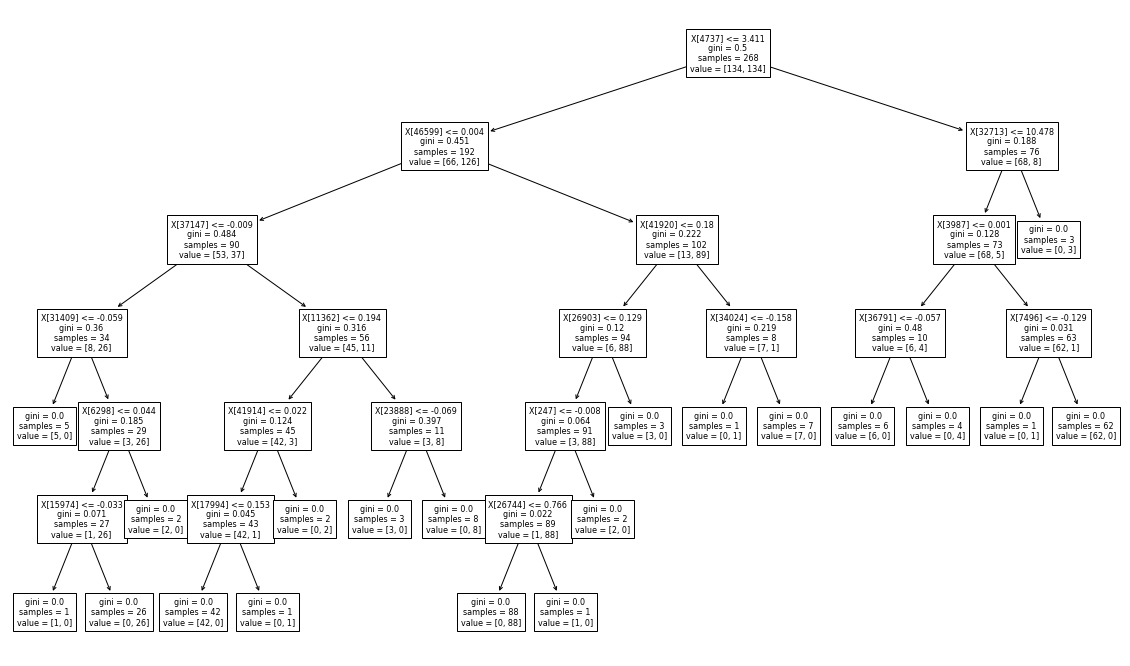

In [123]:
plt.figure(figsize=(20,12))
tree.plot_tree(clf, fontsize=8)
plt.show()

In [9]:
tab1 = pd.read_csv("silver_seq/silver_seq_counts.txt", sep="\t")
tab2 = pd.read_csv("burgos_dbgap/burgos_dbgap_counts.txt", sep="\t")
